# Data Preparation steps: practicing feature Normalisation, feature Binning and row Sampling



In [1]:
# Good tutorial on pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html
# Pandas Cookbook: http://pandas.pydata.org/pandas-docs/stable/tutorials.html
# Another good resource for pandas: http://chrisalbon.com/python/pandas_dataframe_importing_csv.htm

#Import the required packages
#Import package pandas for data analysis
import pandas as pd

# Import package numpy for numeric computing
import numpy as np

# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt

#For showing plots directly in the notebook run the command below
%matplotlib inline

# For saving multiple plots into a single pdf file
from matplotlib.backends.backend_pdf import PdfPages

from sklearn.model_selection import train_test_split

In [2]:
# Reading from a csv file, into a data frame
# Can set parameters to remove white space from the beginning and end of column names
# Read more about .read_csv() here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
df = pd.read_csv('BasketballTeam.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)
# Show data frame first few rows
df.head(30)

,ID,Position,Height,Weight,Sponsorship Earnings,Shoe Sponsor,Career Stage,Age
0,1,forward,192,218,561,yes,veteran,29
1,2,center,218,251,60,no,mid-career,35
2,3,forward,197,221,1312,no,rookie,22
3,4,forward,192,219,1359,no,rookie,22
4,5,forward,198,223,362,yes,veteran,29
5,6,guard,166,188,1536,yes,rookie,21
6,7,forward,195,221,694,no,veteran,25
7,8,guard,182,199,1678,yes,rookie,21
8,9,guard,189,199,385,yes,mid-career,27
9,10,forward,205,232,1416,no,rookie,24


In [3]:
# Check how many rows and columns this dataframe has
df.shape

(30, 8)

In [4]:
# Show the data types in each column.
# int64 and float64 are numeric columns.
# The pandas type 'object' stands for Python strings
# Columns mixing numbers and characters are automatically converted to type 'object'.
# Some of the type 'object' columns may be more appropriate as continuous or as categorical types.
# We first explore the data, then decide which columns should be treated as 'continuous' and which 
# should be treated as 'categorical'.
# You can see below that some columns are wrongly set to continuous types, e.g., ID.
df.dtypes

ID                       int64
Position                object
Height                   int64
Weight                   int64
Sponsorship Earnings     int64
Shoe Sponsor            object
Career Stage            object
Age                      int64
dtype: object

In [5]:
# Look at column names. Some have spaces in or after the name, e.g., 'Insurance Type '.
df.columns

Index(['ID', 'Position', 'Height', 'Weight', 'Sponsorship Earnings',
       'Shoe Sponsor', 'Career Stage', 'Age'],
      dtype='object')

In [6]:
# Clean the column names to remove white space after the name or in the name
df.columns = df.columns.str.replace(' ', '')
#df.columns = df.columns.str.replace(' ', '_')

In [7]:
df.columns

Index(['ID', 'Position', 'Height', 'Weight', 'SponsorshipEarnings',
       'ShoeSponsor', 'CareerStage', 'Age'],
      dtype='object')

In [8]:
# Descriptive stats for continuous features
# Transpose the table so it looks like the table in the lecture/textbook
# One feature per row, stats in the columns
# The 'count' column shows how many rows have data for that feature.
# We can see that Num Soft Tissue only has 490 rows defined (out of 500 rows total), so 10 rows are 
# missing this value.
# This table does not show the cardinality and the %Missing columns.
# We compute them below.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30.0,15.500000,8.803408,1.0,8.25,15.5,22.75,30.0
Height,30.0,191.100000,13.606160,158.0,185.00,192.0,198.00,218.0
Weight,30.0,215.033333,19.801573,183.0,199.25,218.0,229.75,251.0
SponsorshipEarnings,30.0,814.400000,557.700241,12.0,367.75,671.0,1347.25,1855.0
Age,30.0,26.400000,4.206727,19.0,22.25,27.0,29.00,35.0


In [9]:
#Keep only the numeric features.
numeric_columns = df.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['ID', 'Height', 'Weight', 'SponsorshipEarnings', 'Age'], dtype='object')

In [10]:
# Select only the numeric features
df[numeric_columns].head()

,ID,Height,Weight,SponsorshipEarnings,Age
0,1,192,218,561,29
1,2,218,251,60,35
2,3,197,221,1312,22
3,4,192,219,1359,22
4,5,198,223,362,29


In [11]:
# A way to get the number of unique values for all features
df.nunique()

ID                     30
Position                3
Height                 23
Weight                 21
SponsorshipEarnings    30
ShoeSponsor             2
CareerStage             3
Age                    13
dtype: int64

In [12]:
#Missing data
#http://pandas.pydata.org/pandas-docs/stable/missing_data.html
# When summing data, NA (missing) values will be treated as zero
# If the data are all NA, the result will be NA
# Methods like cumsum and cumprod ignore NA values, but preserve them in the resulting arrays

#Missing data all features
df.isnull().sum()

ID                     0
Position               0
Height                 0
Weight                 0
SponsorshipEarnings    0
ShoeSponsor            0
CareerStage            0
Age                    0
dtype: int64

In [13]:
#Select all columns of type 'object'
object_columns = df.select_dtypes(['object']).columns
object_columns

Index(['Position', 'ShoeSponsor', 'CareerStage'], dtype='object')

In [14]:
#Convert selected columns to type 'category'
for column in object_columns:
    df[column] = df[column].astype('category')
df.dtypes    

ID                        int64
Position               category
Height                    int64
Weight                    int64
SponsorshipEarnings       int64
ShoeSponsor            category
CareerStage            category
Age                       int64
dtype: object

In [15]:
# Turn the feature ID into type 'object' so it is not used during descriptive stats
df['ID'] = df['ID'].astype('object')
df.dtypes

ID                       object
Position               category
Height                    int64
Weight                    int64
SponsorshipEarnings       int64
ShoeSponsor            category
CareerStage            category
Age                       int64
dtype: object

In [16]:
numeric_columns = df.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['Height', 'Weight', 'SponsorshipEarnings', 'Age'], dtype='object')

In [17]:
#Look at the categorical features only
category_columns = df.select_dtypes(['category']).columns
category_columns

Index(['Position', 'ShoeSponsor', 'CareerStage'], dtype='object')

In [18]:
# Descriptive stats for categorical features only.
df[category_columns].describe().T

,count,unique,top,freq
Position,30,3,forward,12
ShoeSponsor,30,2,no,16
CareerStage,30,3,mid-career,12


In [19]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  0
Number of duplicate rows (including first) in the table is: 0


In [20]:
# Check for duplicate columns
#First transpose the df so columns become rows, then apply the same check as above
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


# Normalisation of numeric features

In [21]:
# Look once again at the summary stats table for numeric features
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Height,30.0,191.100000,13.606160,158.0,185.00,192.0,198.00,218.0
Weight,30.0,215.033333,19.801573,183.0,199.25,218.0,229.75,251.0
SponsorshipEarnings,30.0,814.400000,557.700241,12.0,367.75,671.0,1347.25,1855.0
Age,30.0,26.400000,4.206727,19.0,22.25,27.0,29.00,35.0


In [22]:
#Only keep numeric features
df_cont = df[numeric_columns]
df_cont.head()

,Height,Weight,SponsorshipEarnings,Age
0,192,218,561,29
1,218,251,60,35
2,197,221,1312,22
3,192,219,1359,22
4,198,223,362,29


In [23]:
#Range normalise all numeric columns
df_norm = (df_cont - df_cont.min()) / (df_cont.max() - df_cont.min())
df_norm.head()

,Height,Weight,SponsorshipEarnings,Age
0,0.566667,0.514706,0.297884,0.6250
1,1.000000,1.000000,0.026044,1.0000
2,0.650000,0.558824,0.705372,0.1875
3,0.566667,0.529412,0.730874,0.1875
4,0.666667,0.588235,0.189908,0.6250


In [24]:
# Standardise all numeric columns
df_st = (df_cont - df_cont.mean()) / df_cont.std()
df_st.head()

,Height,Weight,SponsorshipEarnings,Age
0,0.066147,0.149820,-0.454366,0.618058
1,1.977046,1.816354,-1.352698,2.044345
2,0.433627,0.301323,0.892236,-1.045944
3,0.066147,0.200321,0.976510,-1.045944
4,0.507123,0.402325,-0.811188,0.618058


## Visualisations of features before and after normalisation

<Figure size 640x480 with 0 Axes>

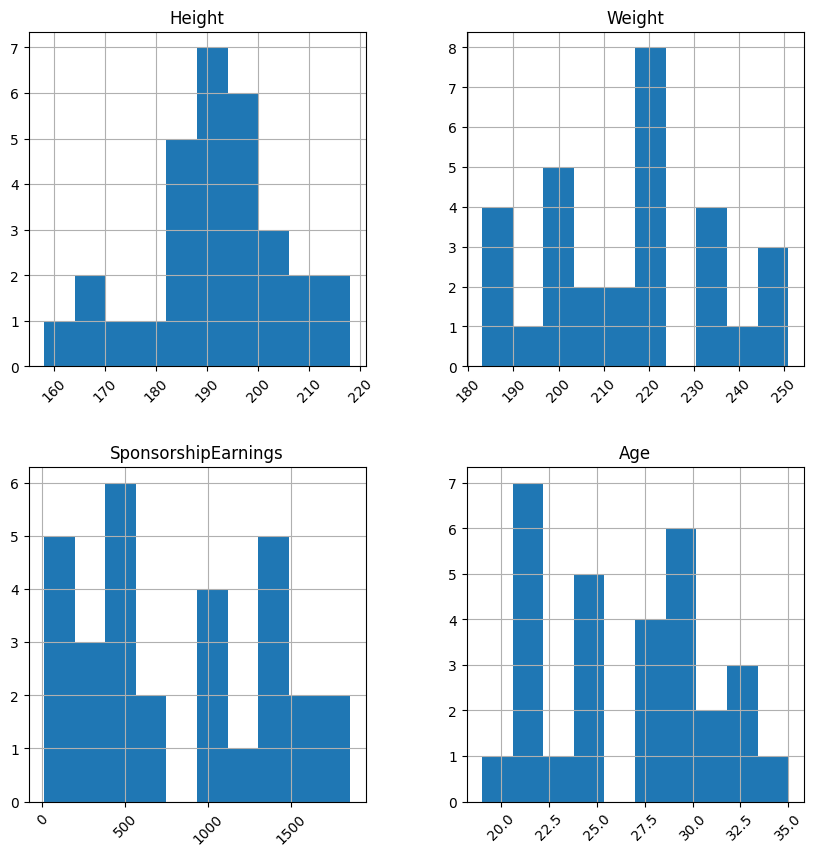

In [25]:
#http://pandas.pydata.org/pandas-docs/stable/visualization.html
# We can plot the histogram of all numeric features at the same time.
plt.figure()
df_cont.hist(figsize=(10, 10), xrot = 45)
# We can save the plot into a file as shown below.
plt.savefig('BasketballTeam-DataQualityReport-NumericFeatures-histograms-1-1.png')

<Figure size 640x480 with 0 Axes>

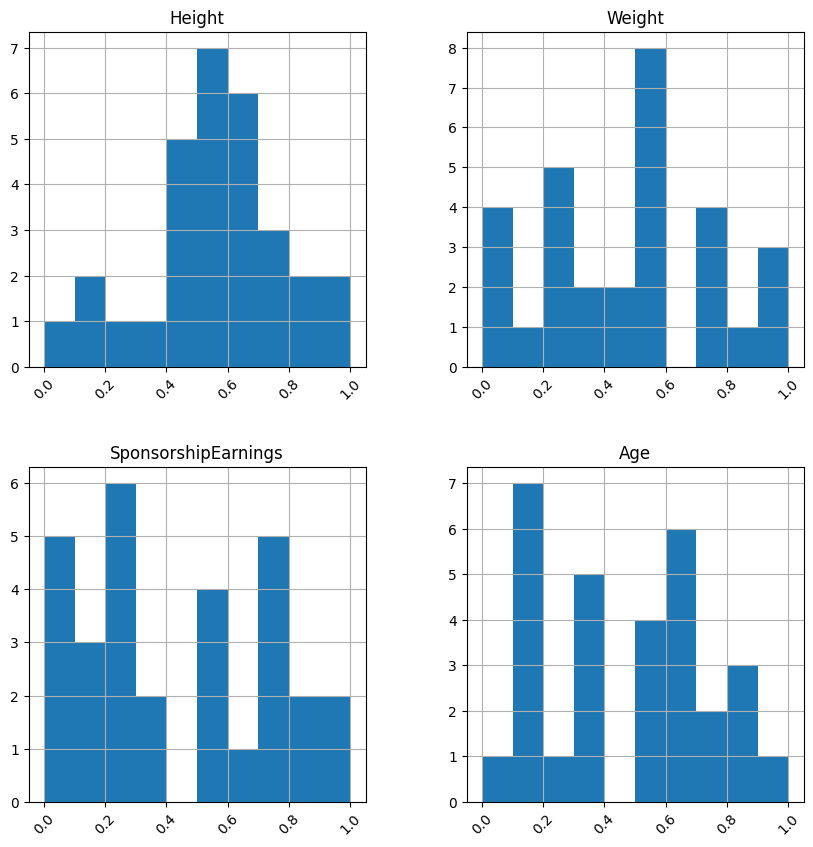

In [26]:
# Histograms of normalised features
plt.figure()
df_norm.hist(figsize=(10, 10), xrot = 45)
# We can save the plot into a file as shown below.
plt.savefig('BasketballTeam-DataQualityReport-NumericFeatures-normalised-histograms-1-1.png')

<Figure size 640x480 with 0 Axes>

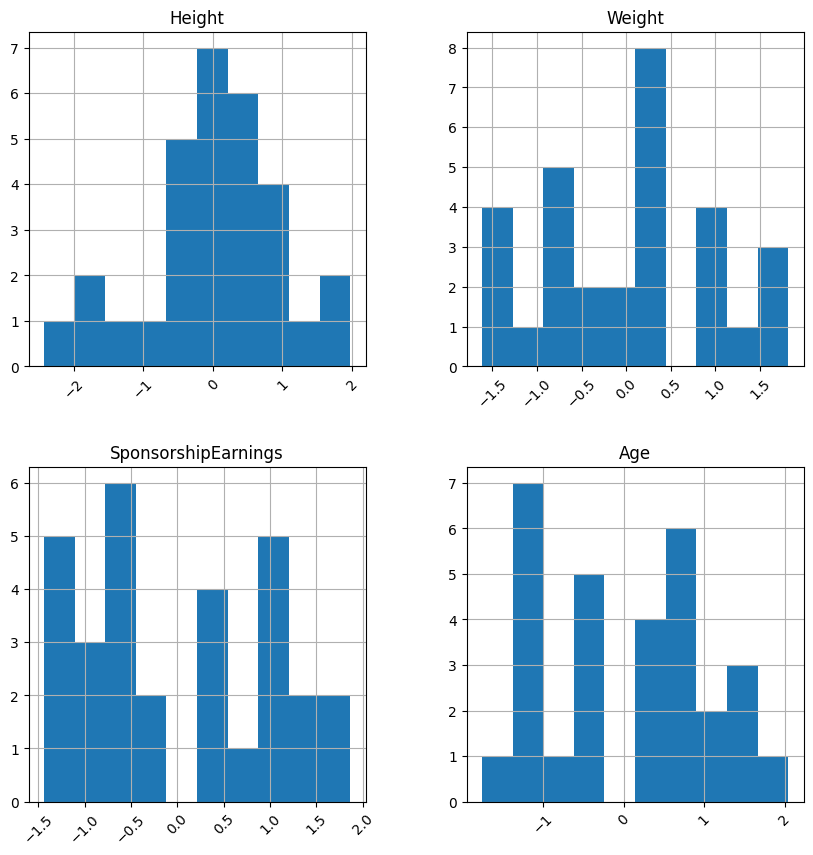

In [27]:
# Histograms of standardised features
plt.figure()
df_st.hist(figsize=(10, 10), xrot = 45)
# We can save the plot into a file as shown below.
plt.savefig('BasketballTeam-DataQualityReport-NumericFeatures-standardised-histograms-1-1.png')

# What happens to normalised features if we have outliers?

In [28]:
#Lets add one outlier on SponsorshipEarnings to check effect on normalisation/standardisation of columns

df_outliers = pd.DataFrame({"Height":[200], 
                            "Weight":[200],
                            "SponsorshipEarnings":[10000],
                          "Age":[35]}) 

df_out = pd.concat([df_cont, df_outliers], ignore_index = True) 
#print(df_cont.shape)
#print(df_out.shape)
# copy df_cont to another data frame and add an outlier row to the new dataframe


<Figure size 640x480 with 0 Axes>

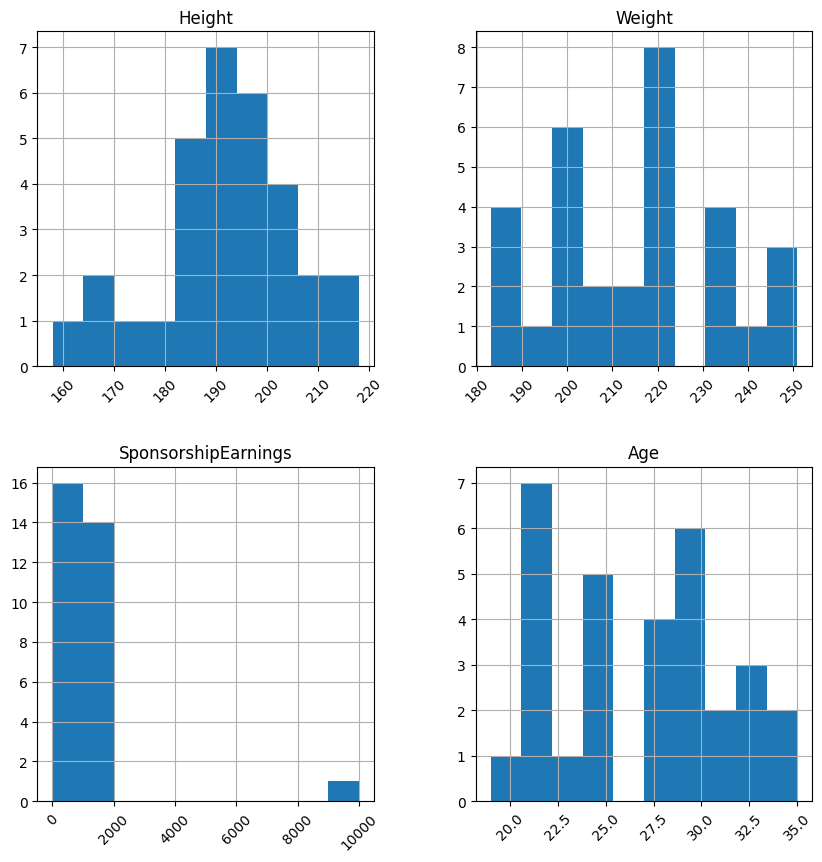

In [29]:
plt.figure()
df_out.hist(figsize=(10, 10), xrot = 45)
# We can save the plot into a file as shown below.
plt.savefig('BasketballTeam-DataQualityReport-NumericFeatures-histograms-outlier-1-1.png')

In [30]:
#Range normalise all numeric columns
df_out_norm = (df_out - df_out.min()) / (df_out.max() - df_out.min())
df_out_norm

,Height,Weight,SponsorshipEarnings,Age
0,0.566667,0.514706,0.054966,0.6250
1,1.000000,1.000000,0.004806,1.0000
2,0.650000,0.558824,0.130156,0.1875
3,0.566667,0.529412,0.134862,0.1875
4,0.666667,0.588235,0.035042,0.6250
5,0.133333,0.073529,0.152583,0.1250
6,0.616667,0.558824,0.068282,0.3750
7,0.400000,0.235294,0.166800,0.1250
8,0.516667,0.235294,0.037345,0.5000
9,0.783333,0.720588,0.140569,0.3125


<Figure size 640x480 with 0 Axes>

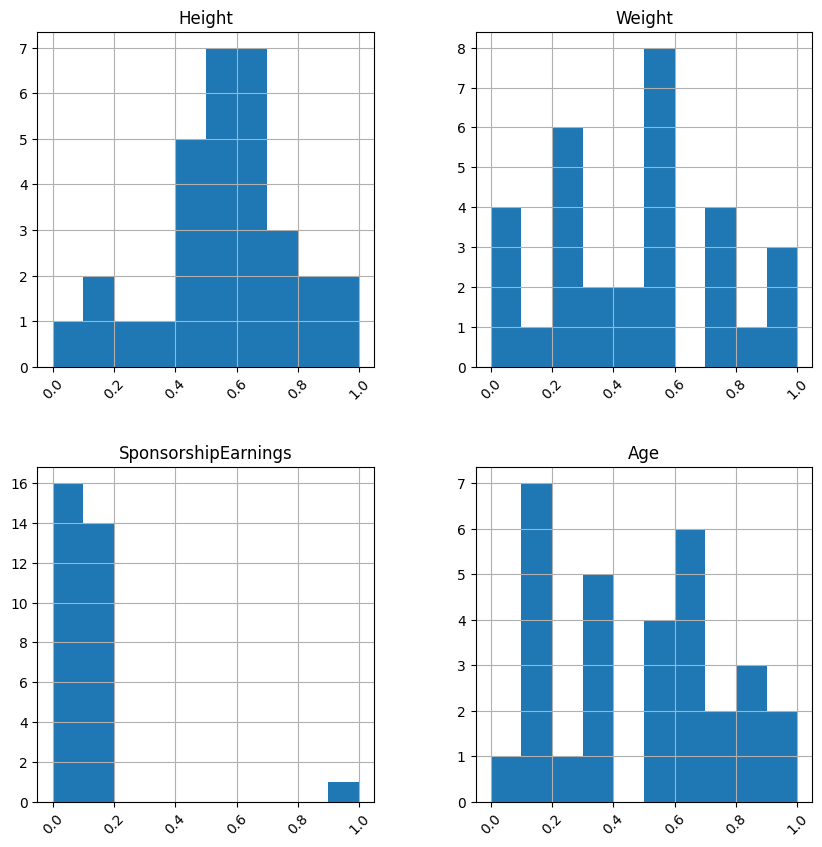

In [31]:
# Histograms of normalised features
plt.figure()
df_out_norm.hist(figsize=(10, 10), xrot = 45)
# We can save the plot into a file as shown below.
plt.savefig('BasketballTeam-DataQualityReport-NumericFeatures-normalised-histograms-outlier-1-1.png')

In [32]:
# Standardise all numeric columns in the dataframe with 1 outlier
df_out_st = (df_out - df_out.mean()) / df_out.std()
df_out_st

,Height,Weight,SponsorshipEarnings,Age
0,0.045492,0.175609,-0.316194,0.526062
1,1.975331,1.854563,-0.604371,1.885057
2,0.416615,0.328241,0.115783,-1.059431
3,0.045492,0.226487,0.142817,-1.059431
4,0.490840,0.429996,-0.430660,0.526062
5,-1.884346,-1.350713,0.244628,-1.285931
6,0.268166,0.328241,-0.239693,-0.379934
7,-0.696753,-0.791062,0.326307,-1.285931
8,-0.177181,-0.791062,-0.417430,0.073064
9,1.010412,0.887893,0.175604,-0.606433


<Figure size 640x480 with 0 Axes>

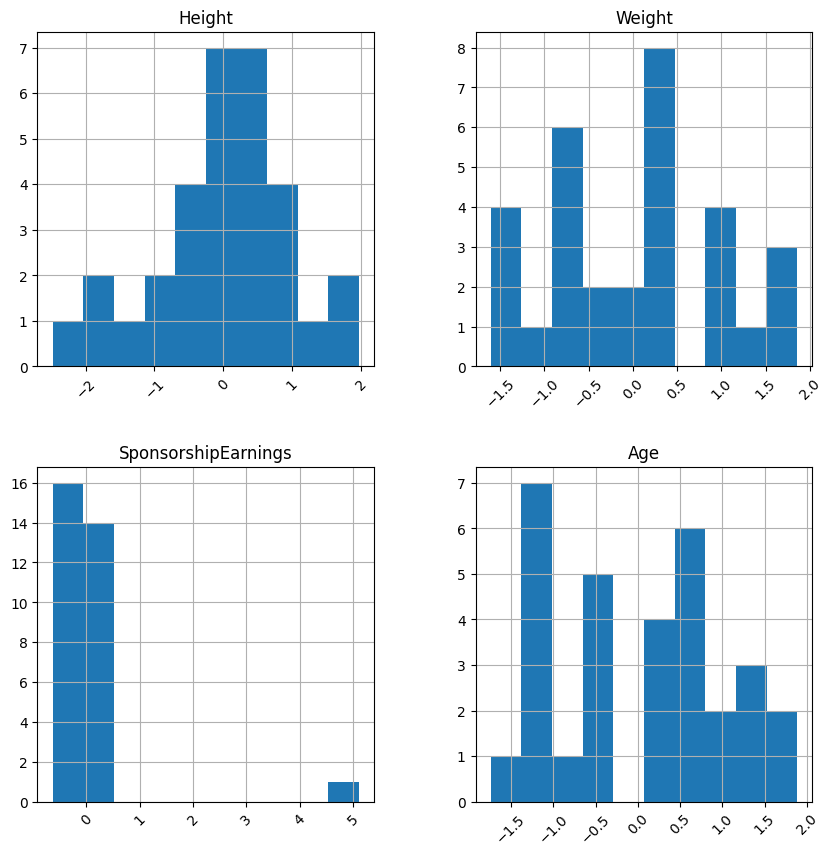

In [33]:
# Histograms of standardised features
plt.figure()
df_out_st.hist(figsize=(10, 10), xrot = 45)
# We can save the plot into a file as shown below.
plt.savefig('BasketballTeam-DataQualityReport-NumericFeatures-standardised-histograms-outlier-1-1.png')

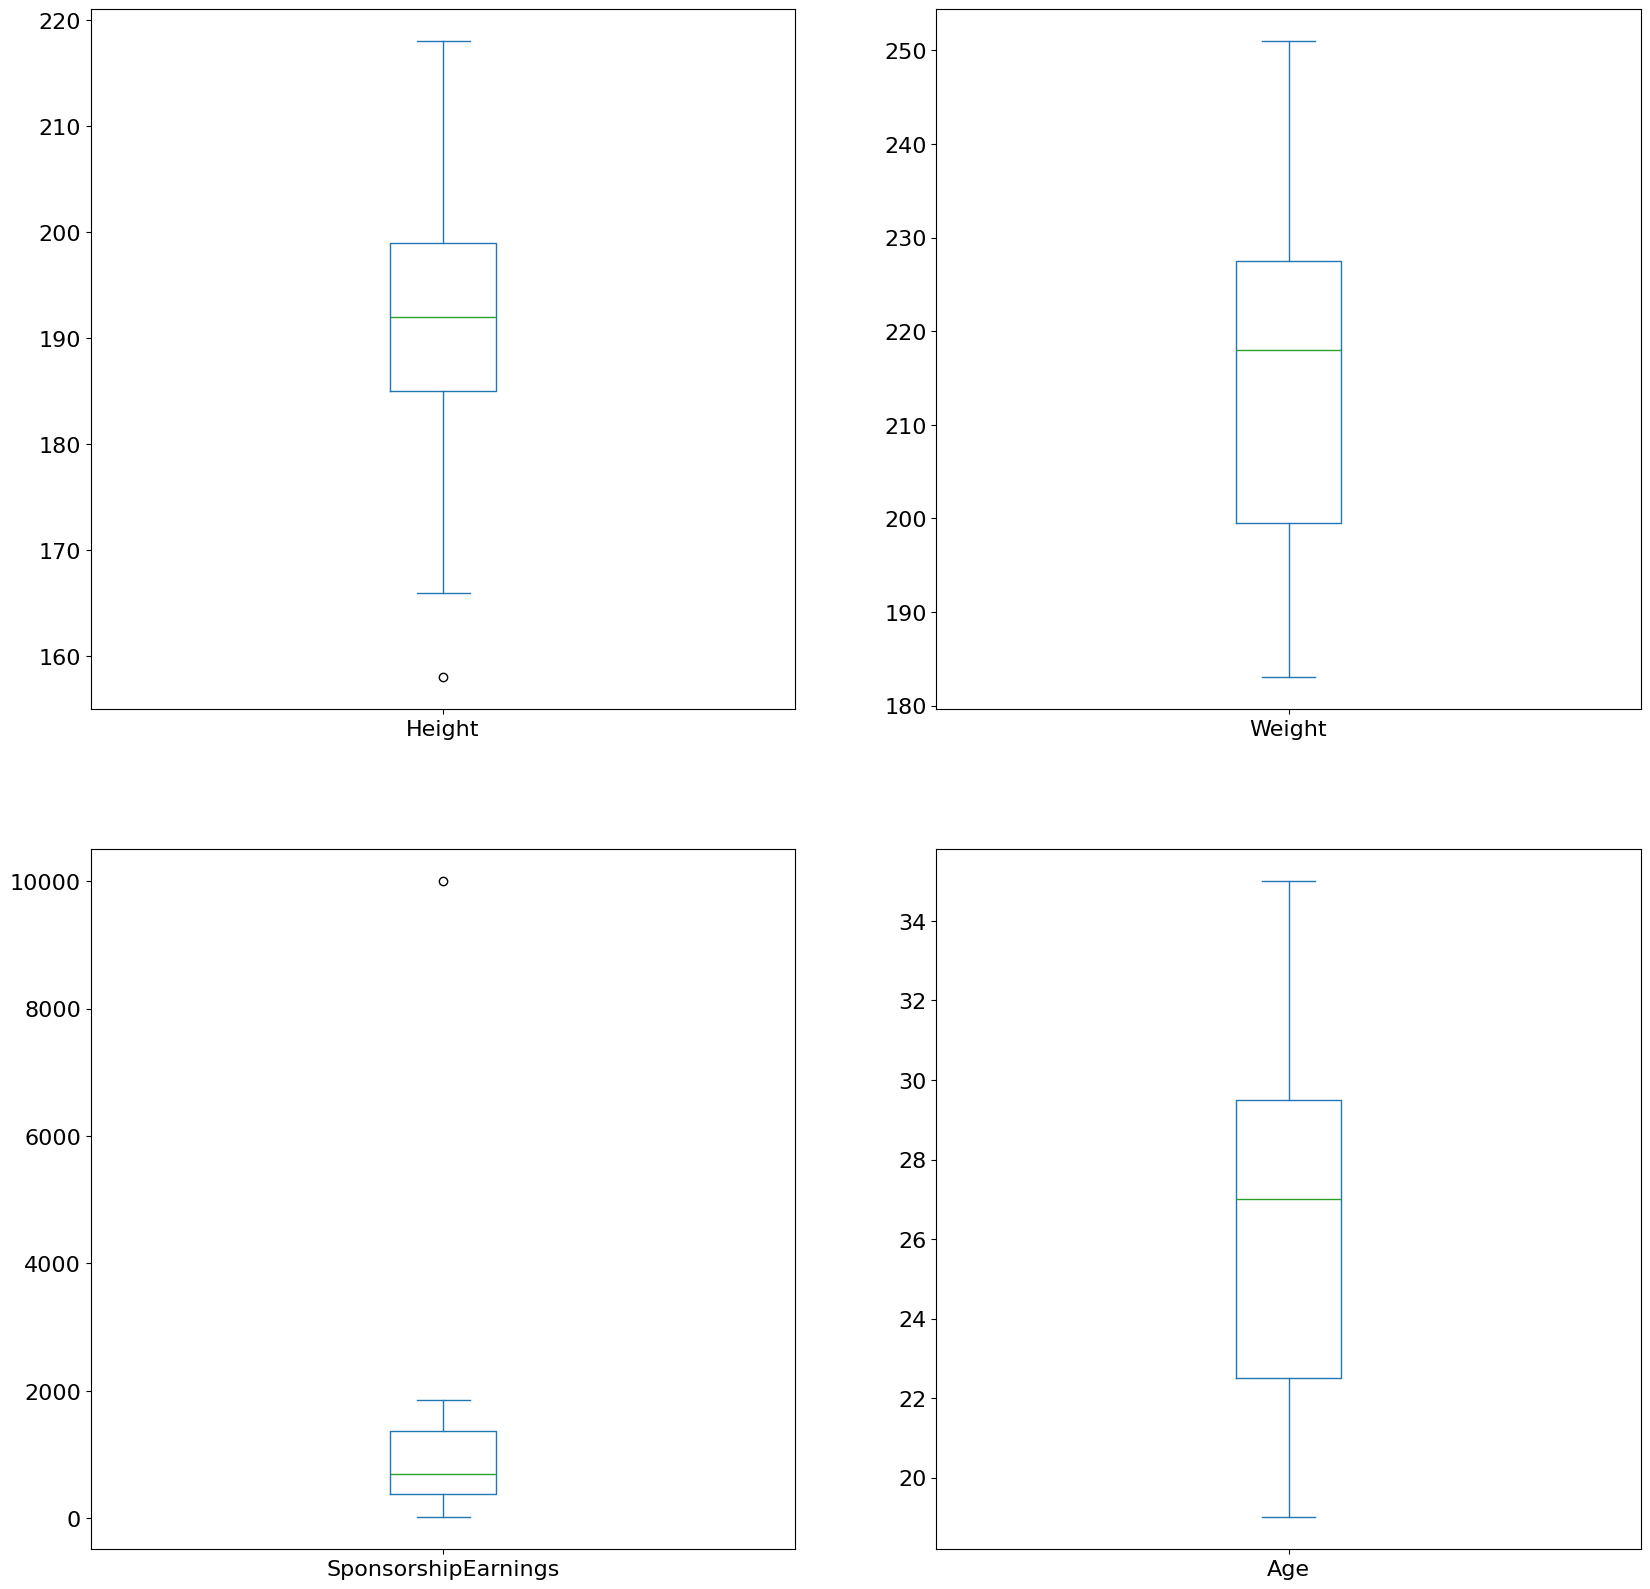

In [34]:
#With outliers the Earnings plot looks squashed
df_out[numeric_columns].plot(kind='box', subplots=True, figsize=(20,20), layout=(2,2), sharex=False, sharey=False, fontsize=16)
plt.savefig('BasketballTeam-DataQualityReport-NumericFeatures-boxplots_all_1-1.pdf')

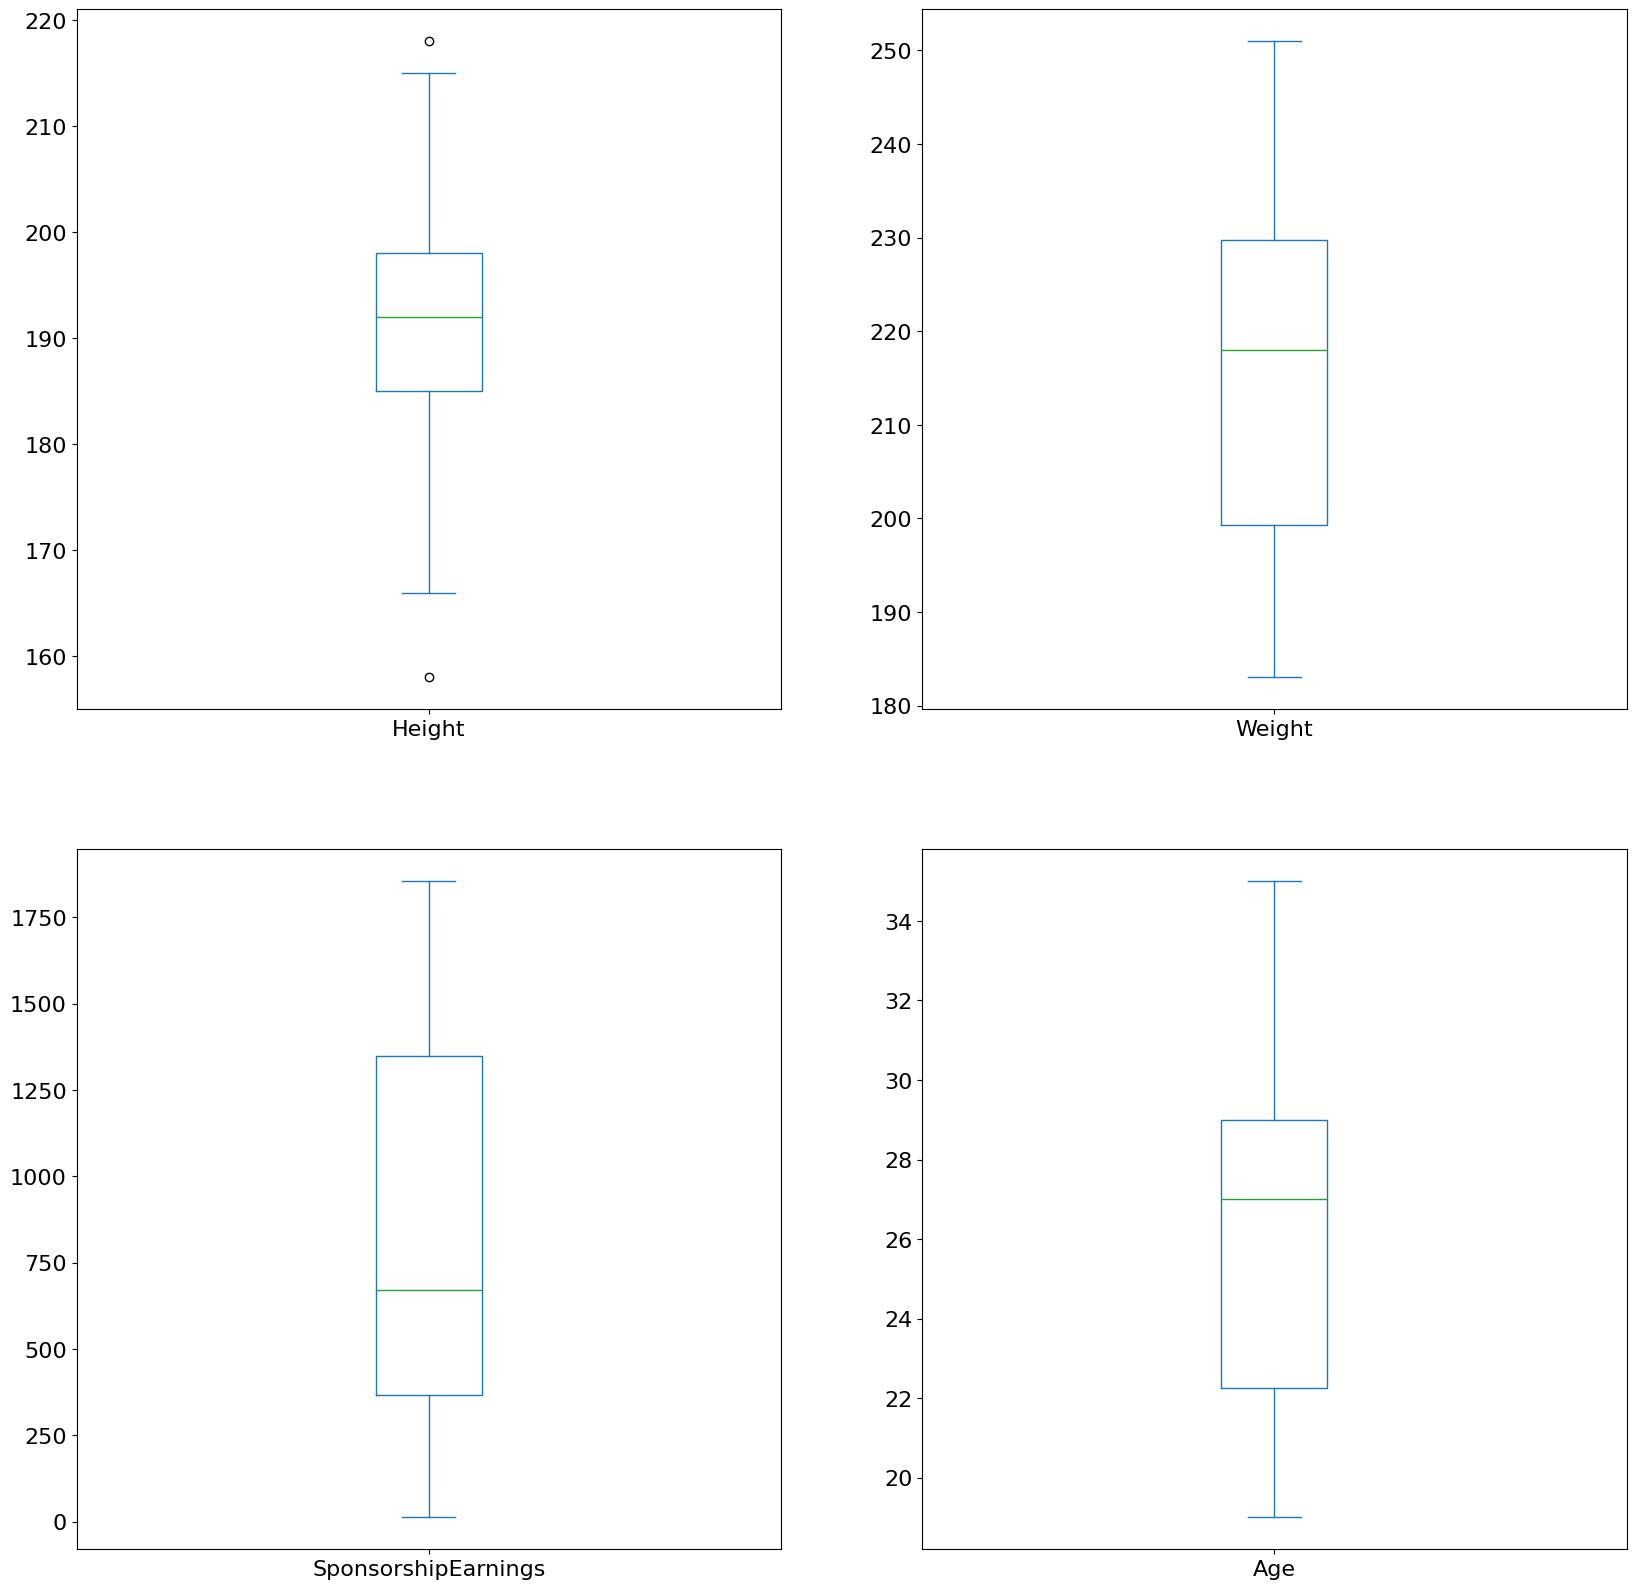

In [35]:
#Without outliers easier to see what happens in Earnings
df_cont.plot(kind='box', subplots=True, figsize=(20,20), layout=(2,2), sharex=False, sharey=False, fontsize=16)
plt.savefig('BasketballTeam-DataQualityReport-NumericFeatures-normalised-boxplots_all_1-1.pdf')

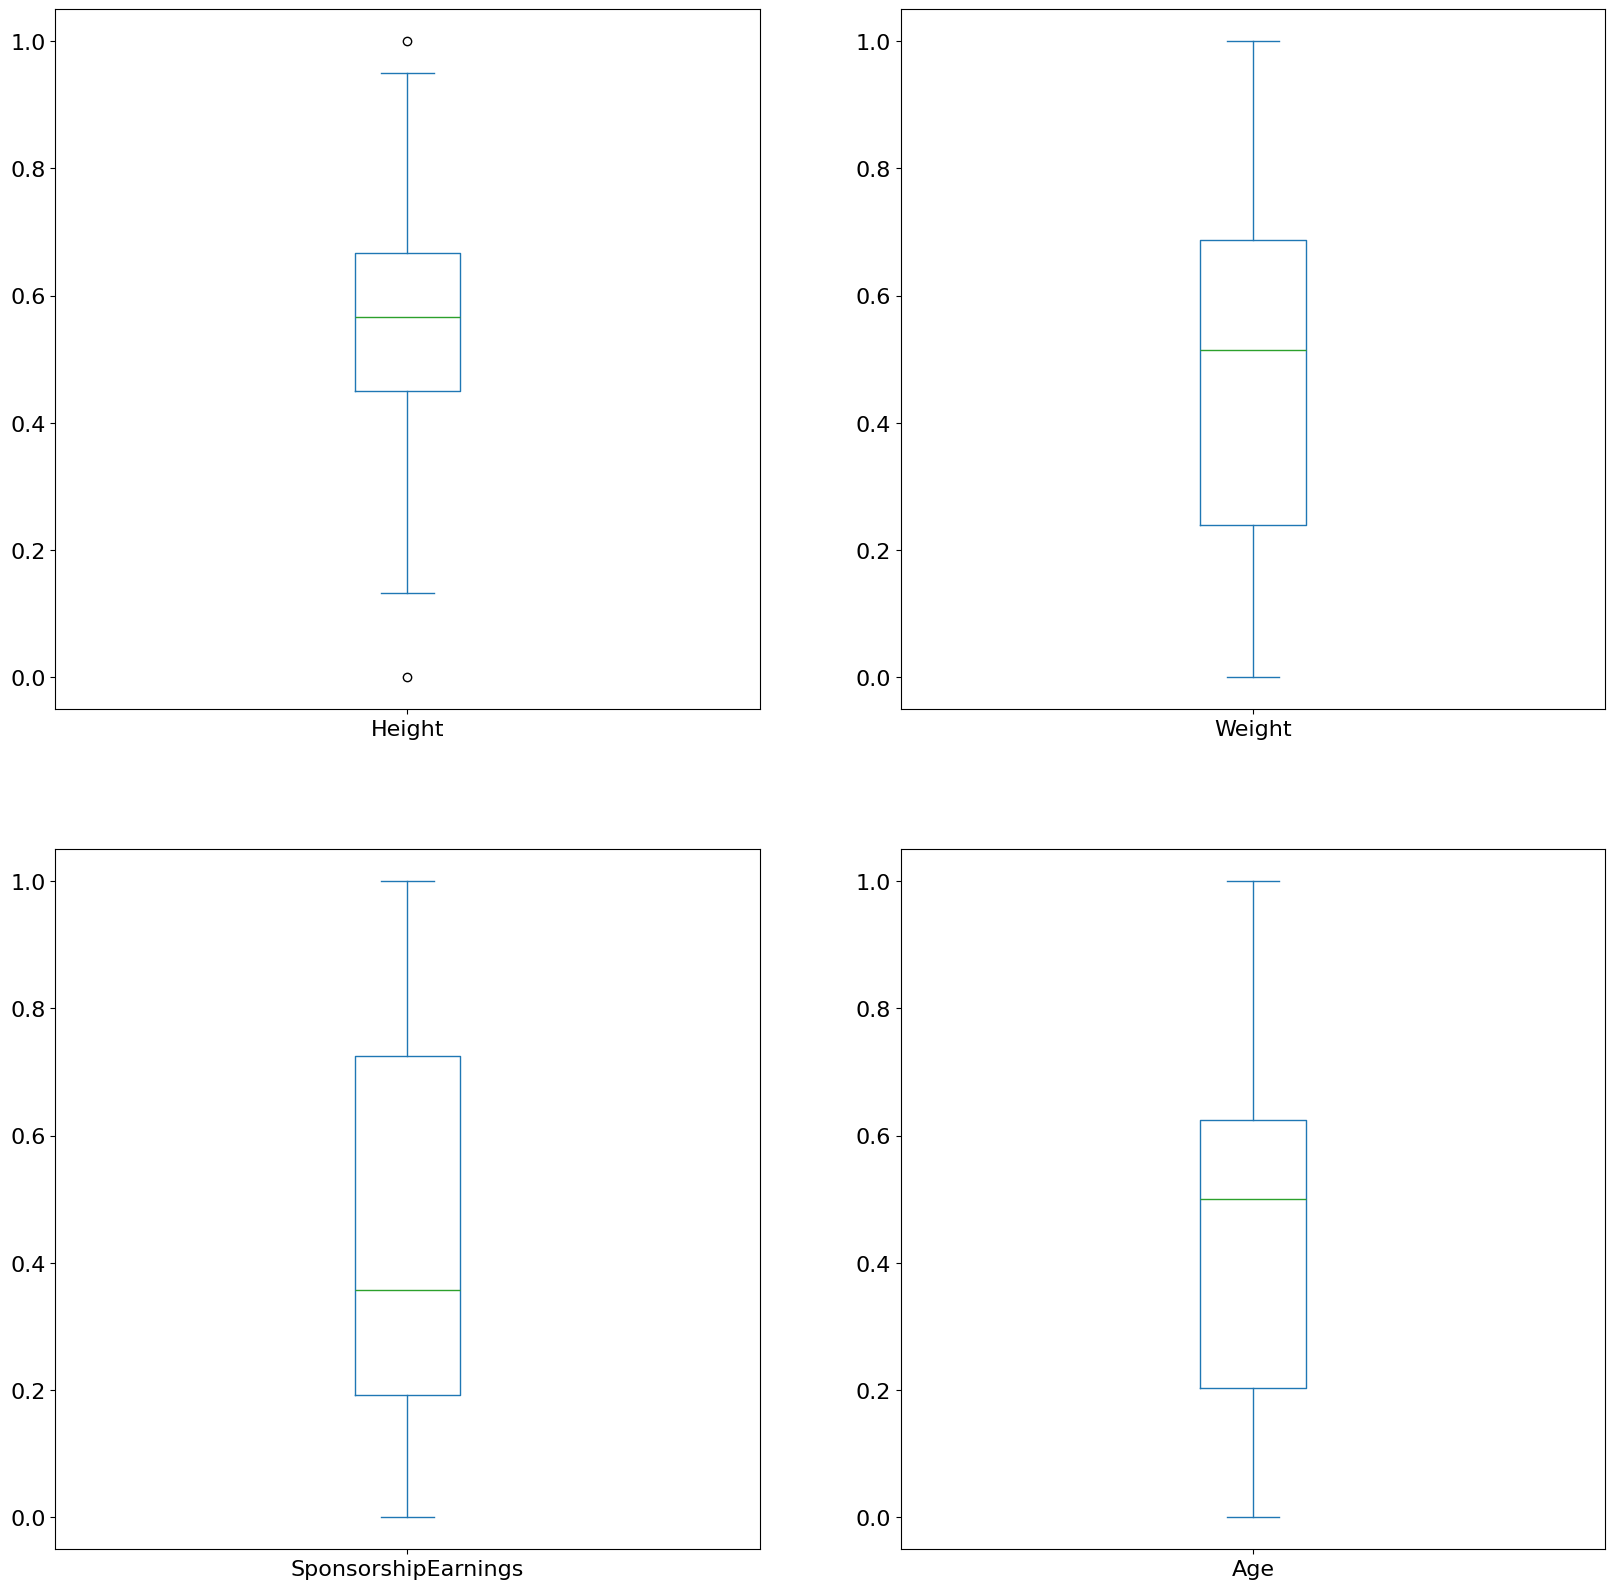

In [36]:
df_norm.plot(kind='box', subplots=True, figsize=(20,20), layout=(2,2), sharex=False, sharey=False, fontsize=16)
plt.savefig('BasketballTeam-DataQualityReport-NumericFeatures-normalised-boxplots_all_1-1.pdf')

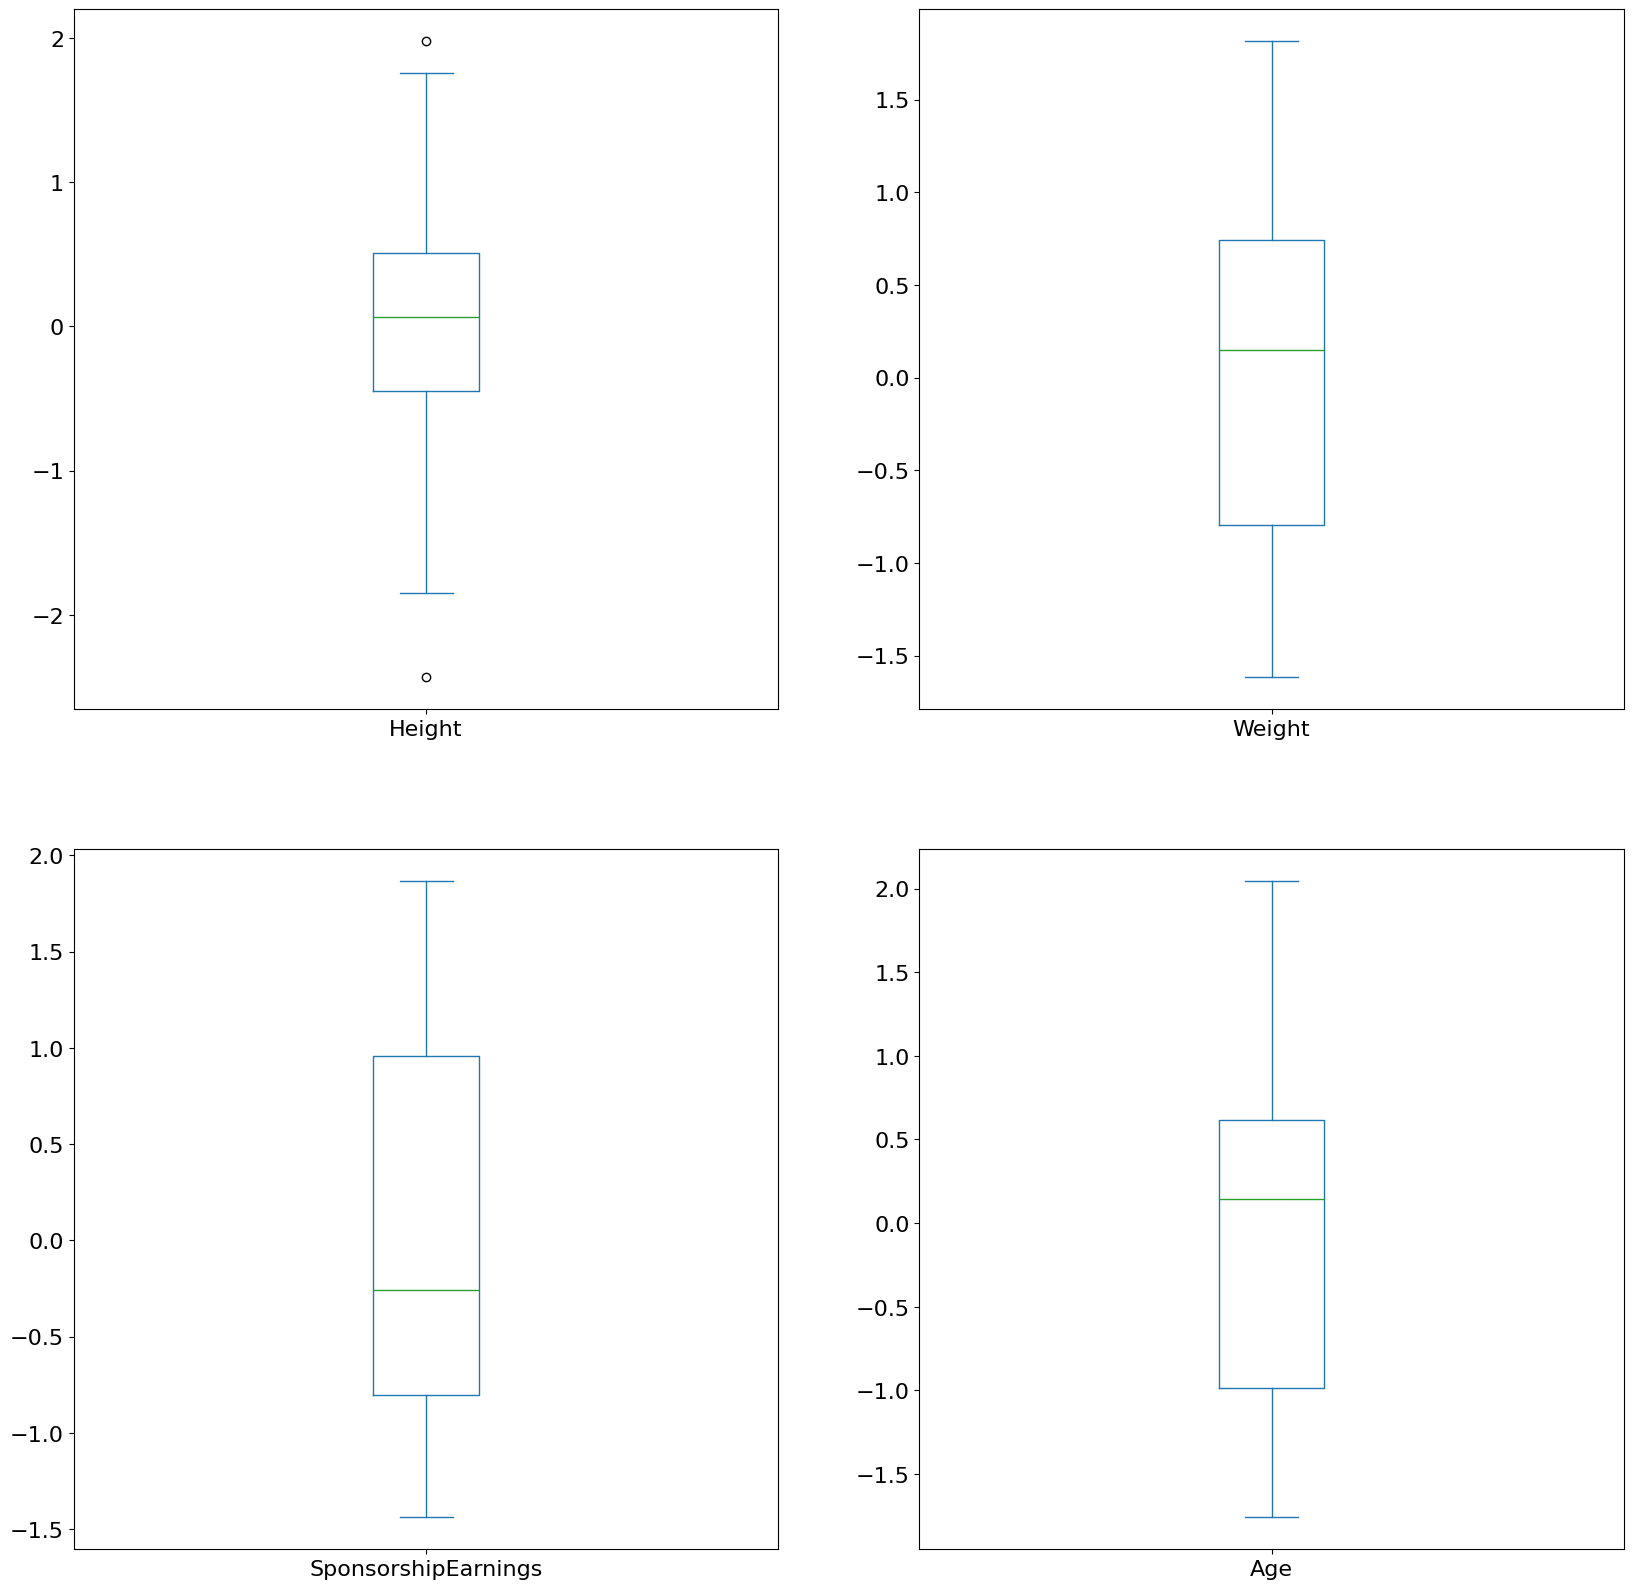

In [37]:
df_st.plot(kind='box', subplots=True, figsize=(20,20), layout=(2,2), sharex=False, sharey=False, fontsize=16)
plt.savefig('BasketballTeam-DataQualityReport-NumericFeatures-standardised-boxplots_all_1-1.pdf')

# Binning of numeric features
Also see example here: https://pbpython.com/pandas-qcut-cut.html

In [38]:
df_cont.head()

,Height,Weight,SponsorshipEarnings,Age
0,192,218,561,29
1,218,251,60,35
2,197,221,1312,22
3,192,219,1359,22
4,198,223,362,29


In [39]:
df['SponsorshipEarnings'].describe()

count      30.000000
mean      814.400000
std       557.700241
min        12.000000
25%       367.750000
50%       671.000000
75%      1347.250000
max      1855.000000
Name: SponsorshipEarnings, dtype: float64

In [40]:
# Bins obtained for the SponsorshipEarnings feature using 4 bins and the qcut function
pd.qcut(df['SponsorshipEarnings'], q=4).value_counts()

SponsorshipEarnings
(11.999, 367.75]     8
(1347.25, 1855.0]    8
(367.75, 671.0]      7
(671.0, 1347.25]     7
Name: count, dtype: int64

In [41]:
# See the binned feature
pd.qcut(df['SponsorshipEarnings'], q=4)

0       (367.75, 671.0]
1      (11.999, 367.75]
2      (671.0, 1347.25]
3     (1347.25, 1855.0]
4      (11.999, 367.75]
5     (1347.25, 1855.0]
6      (671.0, 1347.25]
7     (1347.25, 1855.0]
8       (367.75, 671.0]
9     (1347.25, 1855.0]
10     (11.999, 367.75]
11    (1347.25, 1855.0]
12    (1347.25, 1855.0]
13     (671.0, 1347.25]
14     (11.999, 367.75]
15      (367.75, 671.0]
16     (11.999, 367.75]
17      (367.75, 671.0]
18      (367.75, 671.0]
19      (367.75, 671.0]
20      (367.75, 671.0]
21     (11.999, 367.75]
22     (671.0, 1347.25]
23     (671.0, 1347.25]
24     (11.999, 367.75]
25    (1347.25, 1855.0]
26     (11.999, 367.75]
27    (1347.25, 1855.0]
28     (671.0, 1347.25]
29     (671.0, 1347.25]
Name: SponsorshipEarnings, dtype: category
Categories (4, interval[float64, right]): [(11.999, 367.75] < (367.75, 671.0] < (671.0, 1347.25] < (1347.25, 1855.0]]

In [42]:
df['quantile_ex_q4'] = pd.qcut(df['SponsorshipEarnings'], q=4)
df['quantile_ex_q10'] = pd.qcut(df['SponsorshipEarnings'], q=10, precision=0)

df.head()

,ID,Position,Height,Weight,SponsorshipEarnings,ShoeSponsor,CareerStage,Age,quantile_ex_q4,quantile_ex_q10
0,1,forward,192,218,561,yes,veteran,29,"(367.75, 671.0]","(518.0, 671.0]"
1,2,center,218,251,60,no,mid-career,35,"(11.999, 367.75]","(11.0, 152.0]"
2,3,forward,197,221,1312,no,rookie,22,"(671.0, 1347.25]","(1219.0, 1388.0]"
3,4,forward,192,219,1359,no,rookie,22,"(1347.25, 1855.0]","(1219.0, 1388.0]"
4,5,forward,198,223,362,yes,veteran,29,"(11.999, 367.75]","(294.0, 414.0]"


In [43]:
df['quantile_ex_q10'].value_counts()

quantile_ex_q10
(11.0, 152.0]       3
(152.0, 294.0]      3
(294.0, 414.0]      3
(414.0, 518.0]      3
(518.0, 671.0]      3
(671.0, 1070.0]     3
(1070.0, 1219.0]    3
(1219.0, 1388.0]    3
(1388.0, 1501.0]    3
(1501.0, 1855.0]    3
Name: count, dtype: int64

# Sampling

In [44]:
# Random sampling to extract 1 single subsample
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html
df_random_sample = df.sample(frac=0.3, replace=False, random_state=1)
df_random_sample.to_csv('BasketballTeam-random-30perc-sample.csv', index=False)
df_random_sample

,ID,Position,Height,Weight,SponsorshipEarnings,ShoeSponsor,CareerStage,Age,quantile_ex_q4,quantile_ex_q10
17,18,guard,190,207,648,yes,mid-career,27,"(367.75, 671.0]","(518.0, 671.0]"
21,22,forward,184,213,12,no,mid-career,32,"(11.999, 367.75]","(11.0, 152.0]"
10,11,center,206,246,314,no,mid-career,29,"(11.999, 367.75]","(294.0, 414.0]"
19,20,guard,192,200,427,yes,mid-career,32,"(367.75, 671.0]","(414.0, 518.0]"
14,15,guard,185,197,178,yes,mid-career,29,"(11.999, 367.75]","(152.0, 294.0]"
20,21,forward,202,220,542,no,mid-career,31,"(367.75, 671.0]","(518.0, 671.0]"
26,27,center,196,235,47,no,veteran,32,"(11.999, 367.75]","(11.0, 152.0]"
3,4,forward,192,219,1359,no,rookie,22,"(1347.25, 1855.0]","(1219.0, 1388.0]"
24,25,guard,185,200,213,yes,mid-career,31,"(11.999, 367.75]","(152.0, 294.0]"


In [45]:
#Random sampling to extract 2 subsamples, one for training and one for testing
features = df.columns[df.columns != 'ShoeSponsor']

#Separate the input features and the target feature
X = df[features]
y = df.ShoeSponsor

#print("\nDescriptive features in X:\n", X)
#print("\nTarget feature in y:\n", y)

# Random sample from full df, keep 70% sample for train and remaining 30% sample for test
# If we want to always get the same sample, set random_state=1.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#print("\nTraining data:\n", pd.concat([X_train, y_train], axis=1))
#print("\nTest data:\n", pd.concat([X_test, y_test], axis=1))

print("\nTarget feature ShoeSponsor total dataset counts:\n\n", y.value_counts())
print("\nTraining data ShoeSponsor counts:\n", y_train.value_counts())
print("\nTest data ShoeSponsor counts:\n", y_test.value_counts())




Target feature ShoeSponsor total dataset counts:

 ShoeSponsor
no     16
yes    14
Name: count, dtype: int64

Training data ShoeSponsor counts:
 ShoeSponsor
no     11
yes    10
Name: count, dtype: int64

Test data ShoeSponsor counts:
 ShoeSponsor
no     5
yes    4
Name: count, dtype: int64


In [46]:
# Stratified sampling
features = df.columns[df.columns != 'ShoeSponsor']

X = df[features]
y = df.ShoeSponsor

#print("\nDescriptive features in X:\n", X)
#print("\nTarget feature in y:\n", y)

# Stratify sample wrt column ShoeSponsor (stratify=y) so the train/test samples have a distribution 
# representative of the full sample for the ShoeSponsor=no and ShoeSponsor=yes groups
# Also set random_state=1 so we get the same sample each time we run. This is useful 
# for reproducing the results each time we run.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

#print("\nTraining data:\n", pd.concat([X_train, y_train], axis=1))
#print("\nTest data:\n", pd.concat([X_test, y_test], axis=1))

print("\nTarget feature ShoeSponsor total dataset counts:\n\n", y.value_counts())
print("\nTraining data ShoeSponsor counts:\n", y_train.value_counts())
print("\nTest data ShoeSponsor counts:\n", y_test.value_counts())



Target feature ShoeSponsor total dataset counts:

 ShoeSponsor
no     16
yes    14
Name: count, dtype: int64

Training data ShoeSponsor counts:
 ShoeSponsor
no     11
yes    10
Name: count, dtype: int64

Test data ShoeSponsor counts:
 ShoeSponsor
no     5
yes    4
Name: count, dtype: int64


In [47]:
#Lets make the ShoeSponsor unbalanced
df['ShoeSponsor_Unbalanced'] = ['yes']*30
df

,ID,Position,Height,Weight,SponsorshipEarnings,ShoeSponsor,CareerStage,Age,quantile_ex_q4,quantile_ex_q10,ShoeSponsor_Unbalanced
0,1,forward,192,218,561,yes,veteran,29,"(367.75, 671.0]","(518.0, 671.0]",yes
1,2,center,218,251,60,no,mid-career,35,"(11.999, 367.75]","(11.0, 152.0]",yes
2,3,forward,197,221,1312,no,rookie,22,"(671.0, 1347.25]","(1219.0, 1388.0]",yes
3,4,forward,192,219,1359,no,rookie,22,"(1347.25, 1855.0]","(1219.0, 1388.0]",yes
4,5,forward,198,223,362,yes,veteran,29,"(11.999, 367.75]","(294.0, 414.0]",yes
5,6,guard,166,188,1536,yes,rookie,21,"(1347.25, 1855.0]","(1501.0, 1855.0]",yes
6,7,forward,195,221,694,no,veteran,25,"(671.0, 1347.25]","(671.0, 1070.0]",yes
7,8,guard,182,199,1678,yes,rookie,21,"(1347.25, 1855.0]","(1501.0, 1855.0]",yes
8,9,guard,189,199,385,yes,mid-career,27,"(367.75, 671.0]","(294.0, 414.0]",yes
9,10,forward,205,232,1416,no,rookie,24,"(1347.25, 1855.0]","(1388.0, 1501.0]",yes


In [48]:
df.loc[26:29, 'ShoeSponsor_Unbalanced'] = ['no'] * 4
df

,ID,Position,Height,Weight,SponsorshipEarnings,ShoeSponsor,CareerStage,Age,quantile_ex_q4,quantile_ex_q10,ShoeSponsor_Unbalanced
0,1,forward,192,218,561,yes,veteran,29,"(367.75, 671.0]","(518.0, 671.0]",yes
1,2,center,218,251,60,no,mid-career,35,"(11.999, 367.75]","(11.0, 152.0]",yes
2,3,forward,197,221,1312,no,rookie,22,"(671.0, 1347.25]","(1219.0, 1388.0]",yes
3,4,forward,192,219,1359,no,rookie,22,"(1347.25, 1855.0]","(1219.0, 1388.0]",yes
4,5,forward,198,223,362,yes,veteran,29,"(11.999, 367.75]","(294.0, 414.0]",yes
5,6,guard,166,188,1536,yes,rookie,21,"(1347.25, 1855.0]","(1501.0, 1855.0]",yes
6,7,forward,195,221,694,no,veteran,25,"(671.0, 1347.25]","(671.0, 1070.0]",yes
7,8,guard,182,199,1678,yes,rookie,21,"(1347.25, 1855.0]","(1501.0, 1855.0]",yes
8,9,guard,189,199,385,yes,mid-career,27,"(367.75, 671.0]","(294.0, 414.0]",yes
9,10,forward,205,232,1416,no,rookie,24,"(1347.25, 1855.0]","(1388.0, 1501.0]",yes


In [49]:
#Random sampling on the dataset with unbalanced ShoeSponsor
features = df.columns[df.columns != 'ShoeSponsor_Unbalanced']

X = df[features]
y = df.ShoeSponsor_Unbalanced

#print("\nDescriptive features in X:\n", X)
#print("\nTarget feature in y:\n", y)

# Random sample from full df, keep 70% sample for train and remaining 30% sample for test
# If want to always get the same sample, set random_state=1.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#print("\nTraining data:\n", pd.concat([X_train, y_train], axis=1))
#print("\nTest data:\n", pd.concat([X_test, y_test], axis=1))

print("\nTarget feature ShoeSponsor_Unbalanced total dataset counts:\n\n", y.value_counts())
print("\nTraining data ShoeSponsor_Unbalanced counts:\n", y_train.value_counts())
print("\nTest data ShoeSponsor_Unbalanced counts:\n", y_test.value_counts())


Target feature ShoeSponsor_Unbalanced total dataset counts:

 ShoeSponsor_Unbalanced
yes    26
no      4
Name: count, dtype: int64

Training data ShoeSponsor_Unbalanced counts:
 ShoeSponsor_Unbalanced
yes    18
no      3
Name: count, dtype: int64

Test data ShoeSponsor_Unbalanced counts:
 ShoeSponsor_Unbalanced
yes    8
no     1
Name: count, dtype: int64


In [50]:
# Stratified sampling
features = df.columns[df.columns != 'ShoeSponsor_Unbalanced']

X = df[features]
y = df.ShoeSponsor_Unbalanced

#print("\nDescriptive features in X:\n", X)
#print("\nTarget feature in y:\n", y)

# Stratify sample wrt column ShoeSponsor_Unbalanced (stratify=y) so the train/test samples have a distribution 
# representative of the full sample for the ShoeSponsor_Unbalanced=no and ShoeSponsor_Unbalanced=yes groups
# Also set random_state=1 so we get the same sample each time we run. This is useful 
# for reproducing the results each time we run.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

#print("\nTraining data:\n", pd.concat([X_train, y_train], axis=1))
#print("\nTest data:\n", pd.concat([X_test, y_test], axis=1))

print("\nTarget feature ShoeSponsor_Unbalanced total dataset counts:\n", y.value_counts())
print("\nTraining data ShoeSponsor_Unbalanced counts:\n", y_train.value_counts())
print("\nTest data ShoeSponsor_Unbalanced counts:\n", y_test.value_counts())


Target feature ShoeSponsor_Unbalanced total dataset counts:
 ShoeSponsor_Unbalanced
yes    26
no      4
Name: count, dtype: int64

Training data ShoeSponsor_Unbalanced counts:
 ShoeSponsor_Unbalanced
yes    18
no      3
Name: count, dtype: int64

Test data ShoeSponsor_Unbalanced counts:
 ShoeSponsor_Unbalanced
yes    8
no     1
Name: count, dtype: int64
